For this practical work, We will develop a Python program that is able to implement the accelerated gradient descent methods <b>(Momentum and NAG)</b> in order to achieve the linear regression of a set of datapoints.

#### Import numpy, matplotlib.pyplot and make it inline

In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
%matplotlib inline

To have a dataset or set of data points, the student must generate a pair of arrays <b>X</b> and <b>y</b> with the values in <b>X</b> equally distributed between <b>0</b> and <b>20</b> and the values in <b>y</b> such that: 
<b>yi = a*xi + b (and a = -1, b = 2)</b>


In [2]:
x = 2 * np.linspace(0,20,25)
y = -2 *x + 1

In [3]:
x = x.reshape(x.shape[0],1)
y = y.reshape(y.shape[0],1)
theta = np.random.random((2,1))
theta

array([[0.55704421],
       [0.67316048]])

#### Plot your data points. 

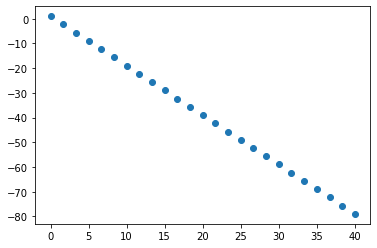

((25, 1), (25, 1))

In [4]:
plt.scatter(x,y)
plt.show()
x.shape,y.shape

#### Use your final version of the implemented Batch GD algorithm for single variable to find the best line filt of the given data.
#### Coose the suitable number of iterations, learning rate, and stop criteria.
#### Calculate r2 score. Shouldn't below 0.9
#### Plot the required curves (loss-epochs, loss-theta0, loss-theta1, all fitted lines per epoch (single graph) , best fit line)

In [5]:
def calc_cost(y,y_hat):
    norm = np.linalg.norm(y_hat - y)
    return (1/2*len(y))  * np.sum(np.square(norm**2))

In [6]:
def batch_gradient_descent(X, y, theta, alpha=0.001, iterations=1000):
    
    m = len(y)
    cost_history = np.zeros(iterations)
    theta_history = np.zeros((iterations,theta.size))
    
    for i in range(iterations):
        
        y_hat = np.dot(X,theta)
        theta = theta -(1/m)*alpha*X.T.dot((y_hat - y))
        
        theta_history[i,:] = theta.T
        cost_history[i]  = calc_cost(y,y_hat)

    return theta, cost_history, theta_history

In [7]:
X = np.c_[ np.ones((len(x),1)),x]
iters = 100
alpha = 0.0001


theta_batch, cost_history_batch, theta_history_batch = batch_gradient_descent(X,y,theta, alpha,iters)

In [8]:
y_hat_batch = theta_batch[0] + theta_batch[1] *x

In [9]:
r2_score(y, y_hat_batch)

0.9997767112654496

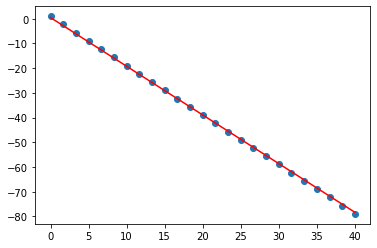

In [10]:
plt.plot(x,y_hat_batch,color= 'red')
plt.scatter(x,y)
plt.show()

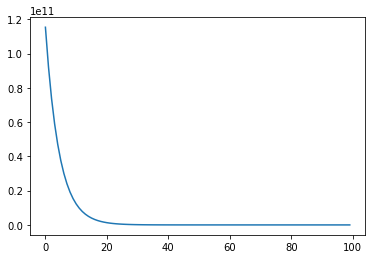

In [11]:
cost_history_batch = cost_history_batch.reshape(cost_history_batch.shape[0],1)
plt.plot(cost_history_batch)
plt.show()

### Update your Batch GD for one variable  implementation to be Momentum-Based GD and check your results

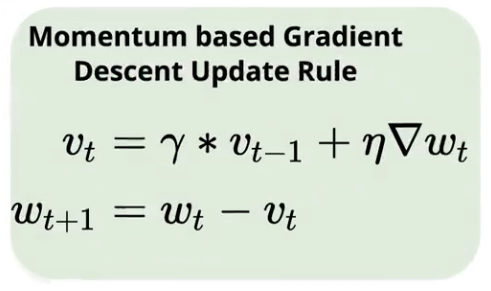

#### γ takes values between 0 and 1.
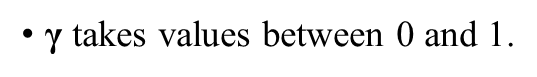

In [12]:
def momentum_gradient_descent(X, y, theta, alpha=0.001, iterations=1000,jama = 0.9):
    
    m = len(y)
    cost_history = np.zeros(iterations)
    theta_history = np.zeros((iterations,theta.size))
    v =0
    for i in range(iterations):
        
        y_hat = np.dot(X,theta)
        v = jama * v +  (1/m)*alpha*X.T.dot((y_hat - y))
        theta = theta - v
        
        theta_history[i,:] = theta.T
        cost_history[i]  = calc_cost(y,y_hat)

    return theta, cost_history, theta_history

In [13]:
iters = 100
alpha = 0.001
jama = 0.9
theta_mom, cost_history_mom, theta_history_mom = momentum_gradient_descent(X,y,theta, alpha,iters,jama)

In [14]:
y_hat_mom = theta_mom[0] + theta_mom[1] *x

In [15]:
r2 = r2_score(y, y_hat_mom)
r2

0.999796155303108

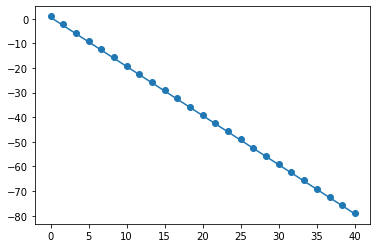

In [16]:
plt.plot(x,y_hat_mom)
plt.scatter(x,y)
plt.show()

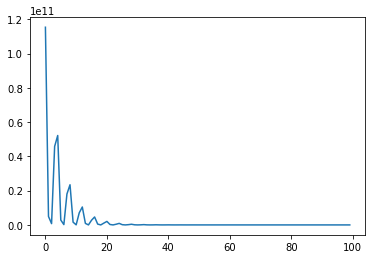

In [17]:
cost_history_mom = cost_history_mom.reshape(cost_history_mom.shape[0],1)
plt.plot(cost_history_mom)
plt.show()

### Update your Batch GD for one variable  implementation to be NAG and check your results

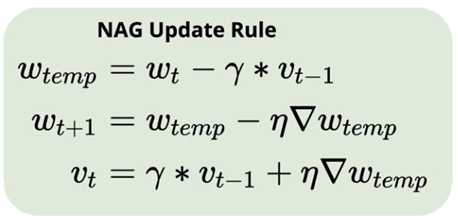

In [18]:
def nag_gradient_descent(X, y, theta, alpha=0.001, iterations=1000,jama = 0.9):
    
    m = len(y)
    cost_history = np.zeros(iterations)
    theta_history = np.zeros((iterations,theta.size))
    v = 0
    for i in range(iterations):
        
        y_hat = np.dot(X,theta)
        
        
        temp = theta - jama * v
        y_hat_temp = np.dot(X,temp)
        temp_grad = (1/m)*alpha*X.T.dot((y_hat_temp - y))
        v = jama * v +  alpha*temp_grad
        theta = theta - v
        
        theta_history[i,:] = theta.T
        cost_history[i]  = calc_cost(y,y_hat)

    return theta, cost_history, theta_history

In [19]:
iters = 1000
alpha = 0.001
jama = 0.9
theta_nag, cost_history_nag, theta_history_nag = nag_gradient_descent(X,y,theta, alpha,iters,jama)

In [20]:
y_hat_nag = theta_nag[0] + theta_nag[1] *x

In [21]:
r2 = r2_score(y, y_hat_nag)
r2

0.9997890571811959

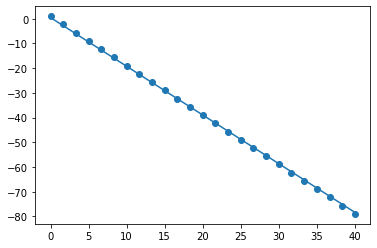

In [22]:
plt.plot(x,y_hat_nag)
plt.scatter(x,y)
plt.show()

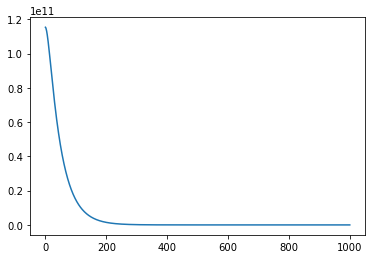

In [23]:
cost_history_nag = cost_history_nag.reshape(cost_history_nag.shape[0],1)
plt.plot(cost_history_nag)
plt.show()

## Congratulations 
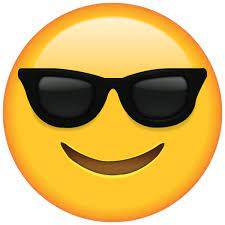